In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/housing_prices/'

Mounted at /content/drive/


In [3]:
train_df =pd.read_csv(PATH + 'house_train.csv')
test_df=pd.read_csv(PATH + 'house_test.csv')
train_df.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


In [4]:
# train_df['state'].unique()
# sns.pairplot(train_df)

In [5]:
test_df.head()

,id,zip,state,county,poverty,price2007
0,6,32162,FL,marion,13.0,265600
1,13,78572,TX,hidalgo,34.0,79900
2,20,11212,NY,kings,21.9,332000
3,30,37042,TN,montgomery,12.7,98700
4,37,85032,AZ,maricopa,12.9,266100


In [6]:
train_df.shape

# train_df.shape

(8973, 7)

In [7]:
test_df.shape

(1063, 6)

In [8]:
for tt in [train_df, test_df]:
  (tt.info())
# train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8973 non-null   int64  
 1   zip        8973 non-null   int64  
 2   state      8973 non-null   object 
 3   county     8973 non-null   object 
 4   poverty    8973 non-null   float64
 5   price2007  8973 non-null   int64  
 6   price2013  8973 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1063 non-null   int64  
 1   zip        1063 non-null   int64  
 2   state      1063 non-null   object 
 3   county     1063 non-null   object 
 4   poverty    1063 non-null   float64
 5   price2007  1063 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memo

no null values present

getting all statistical data

In [9]:
train_df.describe() 

,id,zip,poverty,price2007,price2013
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03
mean,5016.424830,45752.551098,11.438504,2.880939e+05,2.424867e+05
std,2900.023449,31306.650907,4.520784,2.276980e+05,2.176485e+05
min,0.000000,1001.000000,-1.000000,3.400000e+04,3.520000e+04
25%,2505.000000,19026.000000,8.400000,1.397000e+05,1.223000e+05
50%,5023.000000,37324.000000,11.100000,2.230000e+05,1.788000e+05
75%,7528.000000,76085.000000,14.500000,3.627000e+05,2.848000e+05
max,10035.000000,99709.000000,34.000000,3.467800e+06,4.709500e+06


In [10]:
test_df.describe()

,id,zip,poverty,price2007
count,1063.000000,1063.000000,1063.000000,1.063000e+03
mean,5026.575729,45231.877705,11.204798,2.907117e+05
std,2875.433022,31880.881738,4.388406,2.308495e+05
min,6.000000,1002.000000,-1.000000,4.020000e+04
25%,2544.500000,18097.000000,8.300000,1.426500e+05
50%,4953.000000,36582.000000,11.000000,2.302000e+05
75%,7516.500000,75907.000000,14.200000,3.675000e+05
max,10029.000000,99712.000000,34.000000,2.569700e+06


Text(0, 0.5, 'Count')

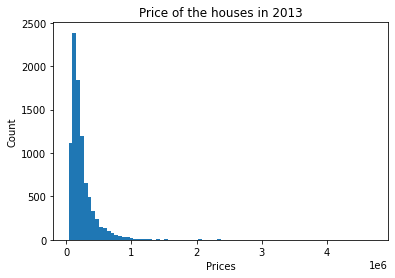

In [11]:
plt.hist(train_df['price2013'], bins=80)
plt.title('Price of the houses in 2013')
plt.xlabel('Prices')
plt.ylabel('Count')

**Task 2:**

To divide data into independent variable and dependent variable since we are using only state information only: state information would include the zip code only for each state since the state column is a string
  x = zip, y = price2013

In [12]:
x = train_df.drop(['id','zip','county','poverty','price2007','price2013'],axis=1)
# x=pd.get_dummies(data=x, drop_first=True)
x=pd.get_dummies(x, columns=['state'], drop_first=True)

y = train_df['price2013']
# x

**i used the get_dummies function to encode the categorical feature by assigning the state column per each state category**

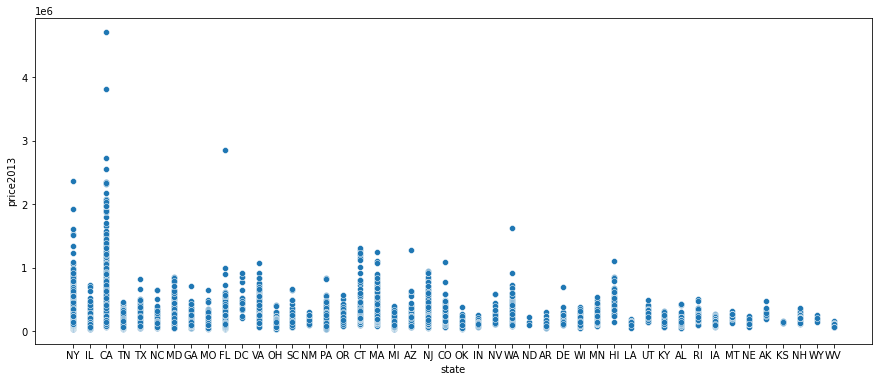

In [13]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='state',y='price2013', data=train_df)
plt.xlabel('state')
plt.ylabel('price2013')
plt.show()


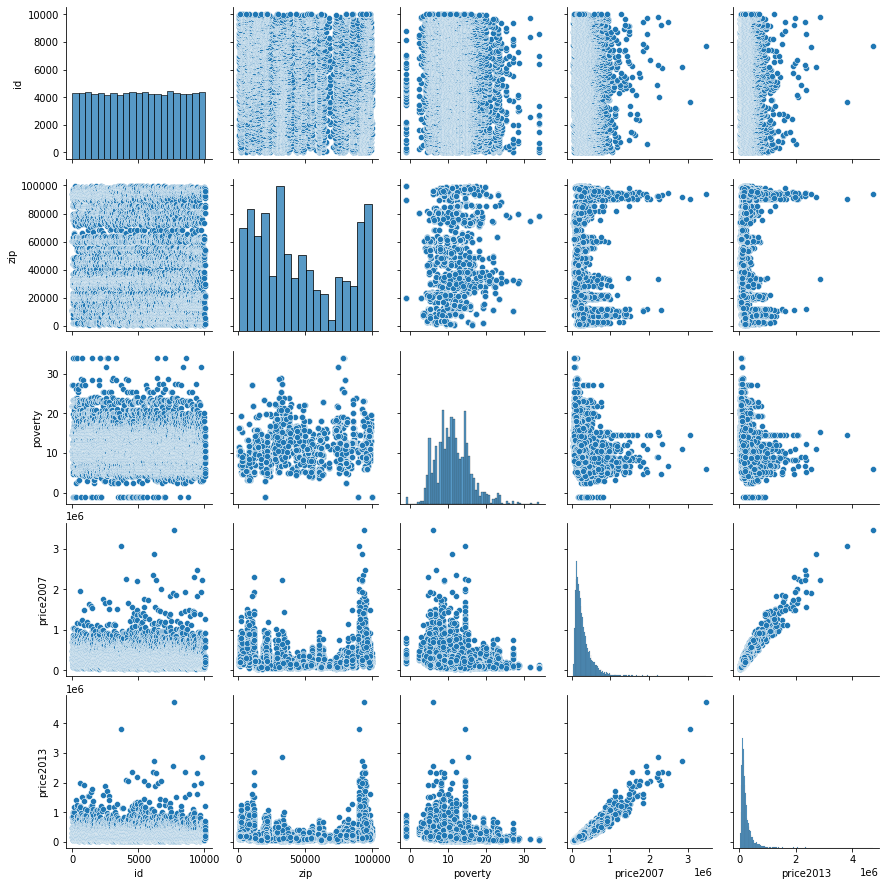

In [14]:
sns.pairplot(train_df)

In [15]:
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [16]:
# x_state=x.iloc[:,:-1]
# calc_vif(x_state)

In [17]:
print(x.shape)
print(y.shape)
x

(8973, 45)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80, test_size=0.2, random_state=100)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# sns.scatterplot(x='state', y='price2013')


(6729, 45)
(2244, 45)
(6729,)
(2244,)


**Using the train_test_split function allows me to split the training data into two data sets  a training and test set. this also allows me to compare with other test data given**

In [19]:
state_lr=LinearRegression()
state_info_lr = state_lr.fit(x_train,y_train) 


**Task 2A**
What is the intercept? What does it correspond to? 


In [20]:
# lr.intercept_
print('the Intercept is', state_lr.intercept_)

the Intercept is 272605.5555555556


**The intercept corresponds to the overall mean value in relation to the state values being equal to zero**

In [21]:
# lr.coef_
print('the state coefficients are \n', state_lr.coef_)


the state coefficients are 
 [-127229.43615257 -147072.22222222  -62854.88888889  242512.10748792
  -23049.93425378   -8378.03877703  174201.11111111  -61396.03174603
  -95628.36924377 -128514.93055556  226514.44444444 -122835.24305556
  -99632.44631186 -134902.99145299 -133325.55555556 -130440.69069069
 -130834.12698413   60961.5585384     9181.42361111 -132063.80297824
  -58636.66666667 -116675.34722222  -43793.05555556 -122816.57250471
 -115738.88888889 -137586.50793651  -75495.83333333   31460.55182699
  -86616.08187135  -52833.81642512   17869.3966433  -154404.9325026
 -162874.18300654  -54124.98001599 -104979.67320261  -66428.63247863
 -126311.74112257 -141499.30555556 -119942.54185693  -38314.64646465
   10843.07458143   -4636.60818713 -109977.26608187 -180165.55555556
  -78125.55555556]


**Task 2B**
How do you get this information from your regression?

**Using the Formula for Linear Regression**
**Y=B0+B1X1**

where Y is the prediction/dependent variable 
B0 is the y-intercept, 
B1 is the coefficient/slope
X1 is the independent variable

In [22]:
coeff_df = pd.DataFrame(state_lr.coef_,x_train.columns,columns=['Coefficients'])
coeff_df['states']=x_train.columns.str.replace('state_','')
coeff_df


,Coefficients,states
state_AL,-127229.436153,AL
state_AR,-147072.222222,AR
state_AZ,-62854.888889,AZ
state_CA,242512.107488,CA
state_CO,-23049.934254,CO
state_CT,-8378.038777,CT
state_DC,174201.111111,DC
state_DE,-61396.031746,DE
state_FL,-95628.369244,FL
state_GA,-128514.930556,GA


**Task 2C**
Based on your regression coefficients, what states have the most and least 
expensive average homes?

In [23]:
# coeff_df.sort_values(by='Coefficients',ascending=False)
print('the state that have the most expensive average homes', coeff_df.max())
print('the state that have the least expensive average homes', coeff_df.min())


the state that have the most expensive average homes Coefficients    242512.107488
states                     WY
dtype: object
the state that have the least expensive average homes Coefficients   -180165.555556
states                     AL
dtype: object


**states WY** has the most expensive homes while **states AL** is the least expennsive homes

In [24]:
coeff_df.value_counts()

Coefficients    states
-180165.555556  WV        1
-86616.081871   NM        1
-75495.833333   NH        1
-66428.632479   RI        1
-62854.888889   AZ        1
-61396.031746   DE        1
-58636.666667   MN        1
-54124.980016   OR        1
-52833.816425   NV        1
-43793.055556   MT        1
-38314.646465   UT        1
-23049.934254   CO        1
-8378.038777    CT        1
-4636.608187    WA        1
 9181.423611    MD        1
 10843.074581   VA        1
 17869.396643   NY        1
 31460.551827   NJ        1
 60961.558538   MA        1
 174201.111111  DC        1
 226514.444444  HI        1
-78125.555556   WY        1
-95628.369244   FL        1
-162874.183007  OK        1
-99632.446312   IL        1
-154404.932503  OH        1
-147072.222222  AR        1
-141499.305556  TN        1
-137586.507937  NE        1
-134902.991453  IN        1
-133325.555556  KS        1
-132063.802978  MI        1
-130834.126984  LA        1
-130440.690691  KY        1
-128514.930556  GA       

In [25]:
# train_df.mean()
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='state', y=train_df['price2013'].mean(), data=train_df)
# price_mean= train_df['price2013'].mean()
print(train_df['price2013'].value_counts())


125300    12
118100    12
111500    10
114900    10
132800    10
          ..
516600     1
607500     1
50800      1
460200     1
181700     1
Name: price2013, Length: 3924, dtype: int64


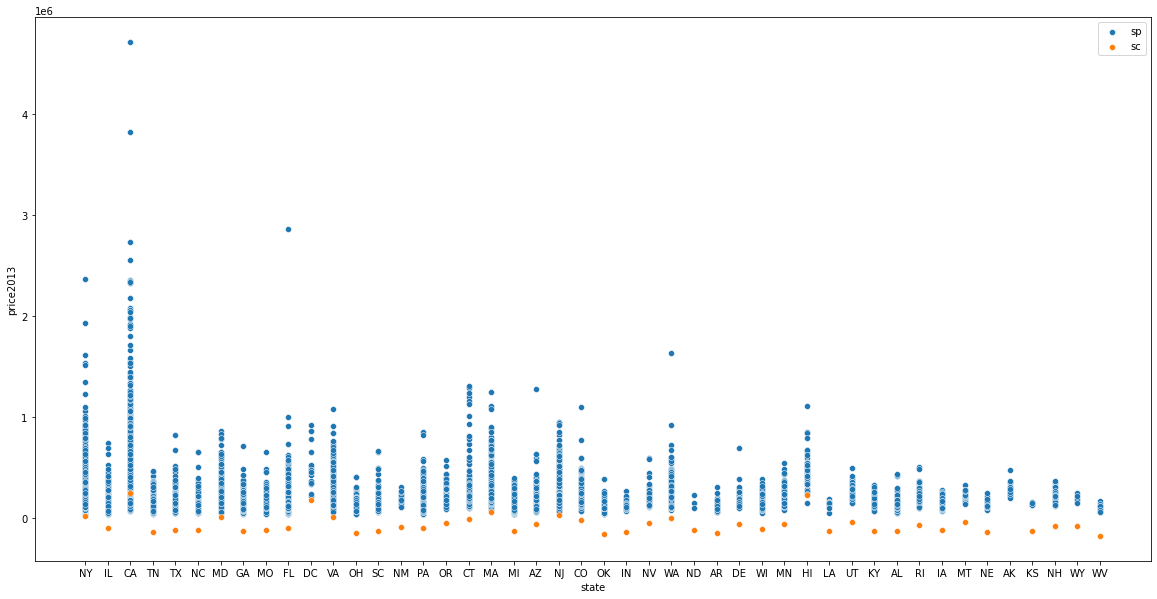

In [26]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(x=train_df['zip'], y=train_df['price2013'])
# sns.barplot(x=x,y='price2013', hue='lr')
# ax=train_df.plot(x='state', y='price2013')
# coeff_df.plot(ax=ax, x='states', y='Coefficients')
# df = pd.concat([train_df,coeff_df]).reset_index(drop=True)
# sns.relplot(data=df, x='price2013',y='Coefficients', hue='states')
fig, ax=plt.subplots(figsize=(20,10))
sns.scatterplot(data=train_df, x='state',y='price2013',label='sp',ax=ax)
sns.scatterplot(data=coeff_df, x='states',y='Coefficients',label='sc',ax=ax)


In [27]:
s_pred_train = state_lr.predict(x_train)
s_pred_train


array([283448.63013699, 137702.56410256, 176977.18631179, ...,
       283448.63013699, 290474.95219885, 290474.95219885])

In [28]:
s_pred_test = state_lr.predict(x_test)
s_pred_test

array([304066.10738255, 176977.18631179, 515117.66304348, ...,
       176977.18631179, 515117.66304348, 140541.75257732])

In [29]:
s_df=pd.DataFrame({'Actual':y_test, 'Predicted': s_pred_test})
s_df

,Actual,Predicted
4644,456600,304066.107383
2710,221200,176977.186312
4803,156900,515117.663043
4807,84800,290474.952199
4088,291800,515117.663043
...,...,...
8054,315700,281786.979167
7180,418100,304066.107383
6584,167000,176977.186312
1294,446600,515117.663043


In [30]:
state_lr.score(x_train,y_train)


0.2948091059057235

In [31]:
print('RMSE Score is :', rmse(y_train,s_pred_train))

RMSE Score is : 180623.02974363702


In [32]:
print('RMSE Score is :', rmse(y_test,s_pred_test))

RMSE Score is : 193493.74134899533


In [33]:
print(mean_absolute_percentage_error(y_test, s_pred_test))

0.5034869214206774


In [34]:
df_pred_s=pd.DataFrame(s_pred_train, columns=['State Predictions'])
df_pred_s

,State Predictions
0,283448.630137
1,137702.564103
2,176977.186312
3,515117.663043
4,197109.722222
...,...
6724,234290.909091
6725,290474.952199
6726,283448.630137
6727,290474.952199


**Task 2D**
How do you get this information from your regression?

***by checking for the maximum and minimum values of the regression coefficients ***

**Task 2E**
 What is the average price of homes in those states?

In [35]:
# avg_price = lr.coef_+lr.intercept_
avg_price_df= pd.DataFrame(state_lr.coef_+state_lr.intercept_,x_train.columns,columns=['Average Price of Homes'])\
.sort_values(by='Average Price of Homes', ascending=False)
avg_price_df

,Average Price of Homes
state_CA,515117.663043
state_HI,499120.000000
state_DC,446806.666667
state_MA,333567.114094
state_NJ,304066.107383
state_NY,290474.952199
state_VA,283448.630137
state_MD,281786.979167
state_WA,267968.947368
state_CT,264227.516779


**Task 2F**

How do you get this information from your regression?

**the coefficients and the intercept define the linear relationship between the two variables and can be estimated as an averate rate of change. so the greater the coefficient, the higher the rate of change. As the average price for each state increases, so does the price of each state**

**Task 3**

Predict 2013 home prices from state and county information.
 
**A.** What US counties have the highest and lowest regression coefficients? 
Why?




In [36]:
X = train_df.drop(['id','zip','poverty','price2007','price2013'],axis=1)
X=pd.get_dummies(data=X, drop_first=True)

Y= train_df['price2013']

In [37]:
print(X.shape)
print(Y.shape)
X

(8973, 672)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, test_size=0.2, random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6729, 672)
(2244, 672)
(6729,)
(2244,)


In [39]:
sc_lr=LinearRegression()
state_cty_info_lr=sc_lr.fit(X_train,y_train)

In [40]:
# sc_lr.coef_
print('State and County coefficients are \n', sc_lr.coef_)

State and County coefficients are 
 [-3.88976765e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -7.21566047e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18  1.04284037e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -1.13934739e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -3.10429150e+18 -3.88976765e+18
 -5.21194706e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -6.85161284e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18 -3.88976765e+18
 -1.04035965e+19  2.49840000e+04  6.89280000e+04  1.04345000e+05
  2.68608000e+05  3.28400000e+04  8.47040000e+04  4.02368000e+05
  3.95840000e+04 -1.42752000e+05  1.10080000e+04  6.33600000e+04
 -2.14084000e+05 -3.88976765e+18  3.79200000e+04  1.01

In [41]:
county_coeff_df = pd.DataFrame(sc_lr.coef_,X_train.columns,columns=['Coefficients'])
# df=pd.concat([coeff_df,county_coeff_df],axis=1)
# df=coeff_df.append(county_coeff_df)
county_coeff_df['states']=X_train.columns.str.replace('state_','')
county_coeff_df['Counties']=X_train.columns.str.replace('county_','')
# county_coeff_df
county_coeff_df
# df.describe()
# df


,Coefficients,states,Counties
state_AL,-3.889768e+18,AL,state_AL
state_AR,-3.889768e+18,AR,state_AR
state_AZ,-3.889768e+18,AZ,state_AZ
state_CA,-3.889768e+18,CA,state_CA
state_CO,-3.889768e+18,CO,state_CO
...,...,...,...
county_yellowstone,-7.854761e+17,county_yellowstone,yellowstone
county_yolo,-1.007200e+04,county_yolo,yolo
county_york,6.278400e+04,county_york,york
county_yuba,-2.856480e+05,county_yuba,yuba


In [42]:
print('the county that have the most expensive average homes', county_coeff_df.max())
print('the county that have the least expensive average homes', county_coeff_df.min())

the county that have the most expensive average homes Coefficients    17544934385948284928.0
states                     county_yuma
Counties                          yuma
dtype: object
the county that have the least expensive average homes Coefficients   -25553149924335656960.0
states                              AL
Counties                         aiken
dtype: object


**the reason why the most expensive county with a higher regression coefficient is beacuse it increases as the average house price increases since it positive and it decreases when the house price decreases and would be negative** 

In [43]:
sc_pred=sc_lr.predict(X_train)
sc_pred  
sc_pred_df=pd.DataFrame(sc_pred, columns=['State & County Predictions'], )
sc_pred_df

,State & County Predictions
0,175616.0
1,168960.0
2,165888.0
3,202752.0
4,172032.0
...,...
6724,111616.0
6725,188416.0
6726,224768.0
6727,118272.0


In [44]:
sc_lr.score(X_train,y_train)

0.5511343973512819

In [45]:
X_test.isnull().sum()

state_AL              0
state_AR              0
state_AZ              0
state_CA              0
state_CO              0
                     ..
county_yellowstone    0
county_yolo           0
county_york           0
county_yuba           0
county_yuma           0
Length: 672, dtype: int64

In [46]:
sc_pred_test = sc_lr.predict(X_test)
sc_pred_test

array([152064., 206848., 319488., ..., 190976., 264704.,  98304.])

In [47]:
s_df=pd.DataFrame({'Actual':y_test, 'Predicted': sc_pred_test})
s_df

,Actual,Predicted
7898,144300,152064.0
4081,283100,206848.0
5400,239600,319488.0
5797,150800,143360.0
8212,349500,410624.0
...,...,...
1291,192900,190976.0
1351,61400,118272.0
1394,178500,190976.0
5180,317100,264704.0


In [48]:
print('RMSE Score:')
print(rmse(y_test,sc_pred_test))


RMSE Score:
1.2245605088885407e+18


In [49]:
print(mean_absolute_percentage_error(y_test, sc_pred_test))

1089477844430.9725


In [50]:
sc_s_pred=pd.concat([df_pred_s,sc_pred_df],axis=1)
sc_s_pred

,State Predictions,State & County Predictions
0,283448.630137,175616.0
1,137702.564103,168960.0
2,176977.186312,165888.0
3,515117.663043,202752.0
4,197109.722222,172032.0
...,...,...
6724,234290.909091,111616.0
6725,290474.952199,188416.0
6726,283448.630137,224768.0
6727,290474.952199,118272.0


**TASK 4**

A.


**XGBoost XGBRegressor is a powerful algorithm and an approach which is mostly for building regression models of which was used here. this allows me to determine the RSME value in comparison with actual values and the predicted values**

In [51]:

from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
                    n_jobs=10,subsample=1,min_child_weight=0.6)
model.fit(X_train,y_train)
preds_test=model.predict(X_test)

[17:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
# preds_test
print('RMSE Score:')
print(rmse(y_test,preds_test))

RMSE Score:
144372.03298596104


In [53]:
test_df1 = pd.get_dummies(test_df)
X_train, X_test = X_train.align(test_df1, join='left', axis=1)
test_df1.head()

,id,zip,poverty,price2007,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,...,county_wood,county_worcester,county_wright,county_yadkin,county_yakima,county_yamhill,county_yavapai,county_yellowstone,county_york,county_yuba
0,6,32162,13.0,265600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,78572,34.0,79900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,11212,21.9,332000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,37042,12.7,98700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,85032,12.9,266100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
preds_test=model.predict(X_test)
print(len(preds_test))

1063


Text(0.5, 1.0, 'Predicted House Price')

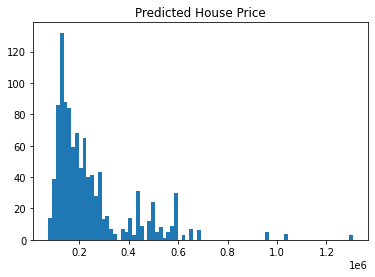

In [55]:
plt.hist(preds_test,bins=80)
plt.title('Predicted House Price')


In [56]:
output = pd.DataFrame({'id':test_df1.id,
                       'prediction': preds_test})
output.to_csv('submission.csv', index=False,header=1)

print("Your submission was successfully saved!")

Your submission was successfully saved!


**Task 4**

**B**

**Best Kaggle score is 170798.88028**


**Task 4**

**C**

**Kaggle Username: MADENIYI_DID**